In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch05-optimization
c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

In [3]:
def f(x,y):
    return x**2 / 20.0 + y**2

def df(x,y):
    return x / 10.0, 2.0*y

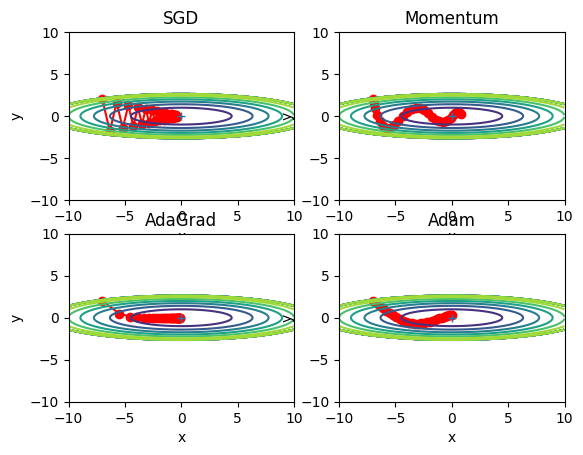

In [6]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0,0

optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x,y)
    Z = f(X, Y)

    #외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    #그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()